## Ejercicio 4: Pruebas Perceptuales
Notebook utilizado para variar valores de luminancia y obtener una misma luminancia perceptual en ambas imagenes

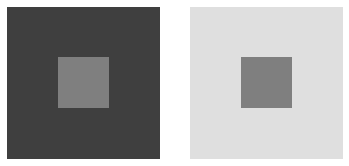

In [86]:
import matplotlib.pyplot as plt
import numpy as np

bkgs = [63, 223]
centre = 127
aux = np.asarray([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
imgs = []
for k in range(len(bkgs)):
    temp = (aux == 0).astype(int) * bkgs[k] + (aux == 1).astype(int) * centre
    imgs.append(temp)
    plt.subplot(1, 2, k + 1)
    plt.imshow(temp, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')

In [80]:
def create_image(bkg, centre):
    img = np.asarray([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
    ret = (img == 0).astype(int) * bkg + (img == 1).astype(int) * centre
    return ret

In [98]:
bkgs = [63, 223]
centres = [127, 200]

In [99]:
from matplotlib import animation, rc
from IPython.display import HTML

plt.rcParams['animation.html'] = 'jshtml'
fig = plt.figure()

plt.subplot(1, 2, 1)
plt.imshow(imgs[0], cmap='gray', vmin=0, vmax=255)
plt.axis('off')

ax = plt.subplot(1, 2, 2)
im = plt.imshow(imgs[1], cmap='gray', vmin=0, vmax=255)
ttl = ax.text(.5, 1.05, '', transform = ax.transAxes)
plt.axis('off')

# initialization function: plot the background of each frame
def init():
    im.set_data(create_image(bkgs[1], centres[0]))
    return [im]

# animation function.  This is called sequentially
def animate(i):
    fig.suptitle(f'Luminancia Central: {centres[0] + i}', fontsize=16)
    a = create_image(bkgs[1], centres[0] + i)
    im.set_array(a)
    return im,

anim = animation.FuncAnimation(fig,animate,init_func=init,frames=centres[1]-centres[0],interval=100)
display(HTML(f'<h1>Caso 1: Backgrounds {bkgs[0]} y {bkgs[1]}</h1>'))
display(HTML(anim.to_jshtml()))
plt.close()